<a href="https://colab.research.google.com/github/SubhashGovindharaj/Simple-Linear-Regression/blob/main/Simple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df=pd.read_csv('height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

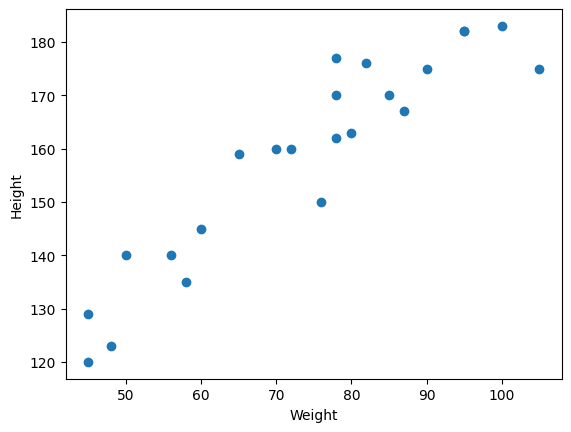

In [ ]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:

## Divide our datsset into indepedent and depeednt featres

X = df[['Weight']] #Indepedent ftr
y = df['Height'] #Depedent ft


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X.shape

(23, 1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [ ]:
## Standarize the dataset Train indepedent data:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) #We neded to transform training data based on test data

In [ ]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [ ]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

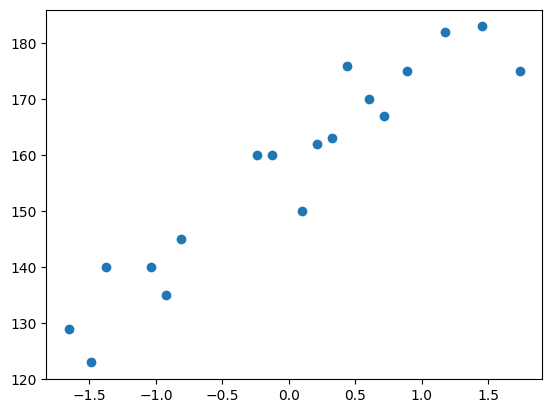

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
## Train pour Simpl linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('The slope or coefficient of weight is ',regressor.coef_)
print('The intercept of weight is ',regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
The intercept of weight is  157.5


Text(0, 0.5, 'Height')

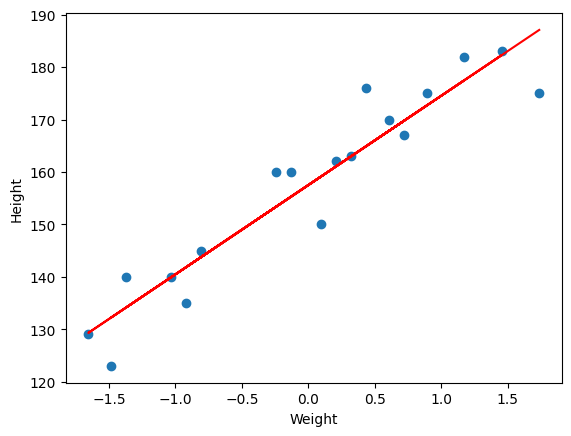

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red') #0o = 157.5 , 01=17.03 h0(x) = 0o+0ox1
plt.xlabel("Weight")
plt.ylabel("Height")

## prediction of train data
predicted height output= intercept +coef_(Weights)
y_pred_train =65.4364 + 1.26(X_train)
prediction of test data
predicted height output= intercept +coef_(Weights)
y_pred_test =65.4364 + 1.26(X_tes

In [ ]:
y_pred_test=regressor.predict(X_test)

In [ ]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

Text(0, 0.5, 'Height')

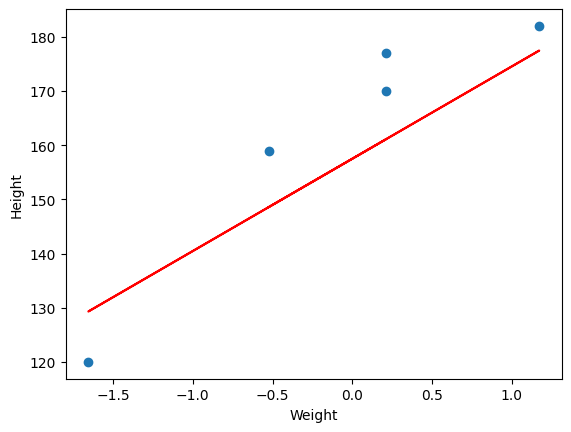

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),color='red') #0o = 157.5 , 01=17.03 h0(x) = 0o+0ox1
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
##Performance metrice


##Calculating MSE, MAE, RMSE
## R squar and adjusted R sqaure - to see the model performanc


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print('The mean squared error is ',mse)
print('The mean absolute error is ',mae)
print('The root mean squared error is ',rmse)

The mean squared error is  109.77592599051664
The mean absolute error is  9.822657814519232
The root mean squared error is  10.477400726827081


In [ ]:
#How much accuracy is?
score = r2_score(y_test,y_pred_test)
print('The score is ',score)

The score is  0.776986986042344


In [ ]:
## Adjusted r2 score

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [ ]:
regressor

LinearRegression()

In [ ]:
## New data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [ ]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

In [ ]:
print('The height prdiction for 80 kg is ',regressor.predict([scaled_weight[0]]))

The height prdiction for 80 kg is  [163.01076266]


Text(0, 0.5, 'Predicted height')

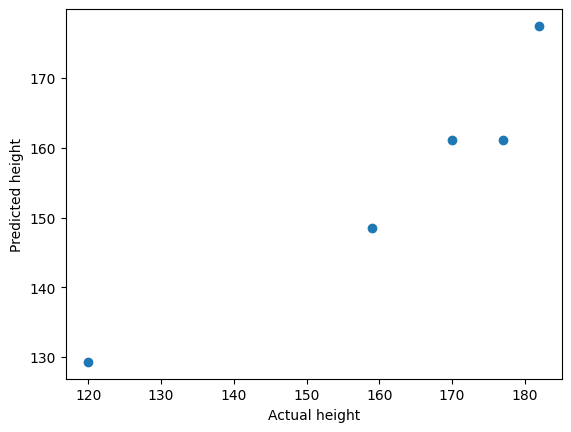

In [ ]:
## Assumptions.

##Plot the scatter plot for prediction

plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual height')
plt.ylabel('Predicted height')

In [ ]:
## Residuals:

residuals = y_test - y_pred_test

In [ ]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

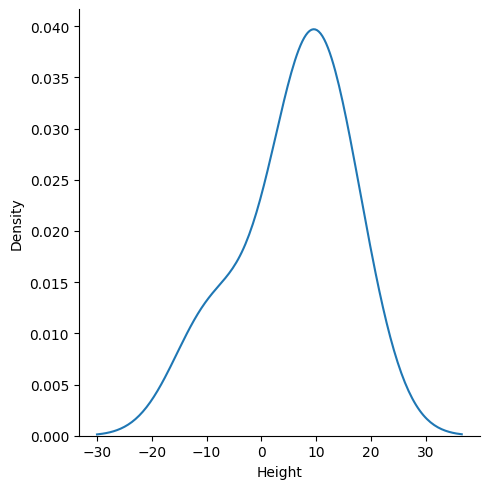

In [ ]:
## Plot this residuals

import seaborn as sns
sns.displot(residuals,kind='kde',)

In [ ]:
## Normal distribution

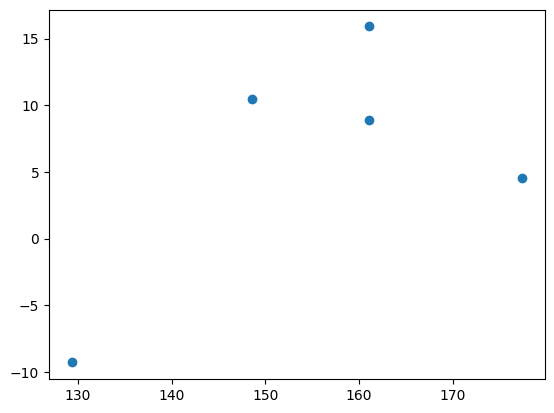

In [ ]:
plt.scatter(y_pred_test,residuals) #Should be uniformly distributed.